**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [3]:
# Import the data set
df = pd.read_csv('cleaned_data.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  \
0  798fc410-45c1      20000    2          2         1   24      2      2   
1  8a8c8f3b-8eb4     120000    2          2         2   26     -1      2   
2  85698822-43f5      90000    2          2         2   34      0      0   
3  0737c11b-be42      50000    2          2         1   37      0      0   
4  3b7f77cc-dbc0      50000    1          2         1   57     -1      0   

   PAY_3  PAY_4  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     -1     -1  ...         0         0         0         0   
1      0      0  ...      1000      1000         0      2000   
2      0      0  ...      1000      1000      1000      5000   
3      0      0  ...      1200      1100      1069      1000   
4     -1      0  ...     10000      9000       689       679   

   default payment next month  EDUCATION_CAT  graduate school  high school  \
0                           1     university                0            0   
1                           1     university                0            0   
2                           0     university                0            0   
3                           0     university                0            0   
4                           0     university                0            0   

   others  university  
0       0           1  
1       0           1  
2       0           1  
3       0           1  
4       0           1  

[5 rows x 30 columns]

In [ ]:
# Define the sigmoid function


**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [4]:
# Create a train/test split
features  = ['PAY_1','LIMIT_BAL']
target = ['default payment next month']

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.20,random_state=24)
print("train data", train.shape)
print("test data",test.shape)

train data (21331, 30)
test data (5333, 30)


In [6]:
X_train = train[features].dropna()
y_train = train[target].dropna()
X_test = test[features].dropna()
y_test = test[target].dropna()

In [7]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (21331, 2)
y_train (21331, 1)
X_test (5333, 2)
y_test (5333, 1)


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [9]:
# Fit the logistic regression model on training data
lr.fit(X_train,y_train)

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Make predictions using `.predict()`
predict = lr.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
# Find class probabilities using `.predict_proba()`
pred_proba = lr.predict_proba(X_test)
pred_proba[:,1]

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606565])

In [12]:
lr.score(X_test,y_test)

0.7834239639977498

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [ ]:
# Add column of 1s to features


In [13]:
# Get coefficients and intercepts from trained model
coef = lr.coef_
intercept = lr.intercept_
print("Coefficient is",lr.coef_)
print("Intercept is",lr.intercept_)

Coefficient is [[ 8.27451187e-11 -6.80876727e-06]]
Intercept is [-6.57647457e-11]


In [14]:
# Manually calculate predicted probabilities
t1= coef[0][0]
t2 = coef[0][1]
a =  X_test['PAY_1']
b =  X_test['LIMIT_BAL']
x = t1*a + t2*b + intercept
manual_pred = 1/(1 + np.exp(-x)) 
if (all(pred_proba[:,1]) ==all(manual_pred)):
    print("predicted Probability are Same")
else:
    print("diff")

predicted Probability are Same


______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [15]:
# Manually calculate predicted classes
manual_pred
mask = list(manual_pred>0.5)
manual_prediction=[]

for i in mask:
    if (i==False):
        manual_prediction.append(0)
    else:
        manual_prediction.append(1)
manual_prediction = np.array(manual_prediction)
manual_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# Compare to scikit-learn's predicted classes
print("manual prediction class",manual_prediction)
print("sklearn prediction class",predict)

manual prediction class [0 0 0 ... 0 0 0]
sklearn prediction class [0 0 0 ... 0 0 0]


In [17]:
if (all(manual_prediction) == all(predict)):
    print("both class prediction are same")
else:
    print("different")

both class prediction are same


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [18]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
pos_proba = pred_proba[:,1]
pos_proba

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606565])

In [19]:
from sklearn.metrics import roc_auc_score
scorer_sklearn = roc_auc_score(y_test, pos_proba)
scorer_sklearn

0.627207450280691

In [20]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

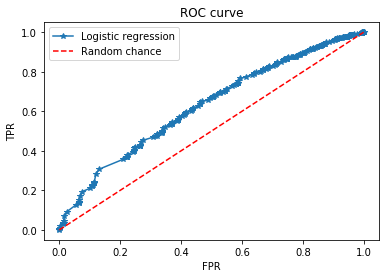

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [ ]:
# Use manually calculated predicted probabilities to calculate ROC AUC
